In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')

In [4]:
df =pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

# Check 

* missing values 
* duplicates 
* data type
* Number of unique values of each column 
* statistics of dataset 
* various categories of categorical column

In [9]:
# missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
# Duplications
df.duplicated().sum()

0

In [11]:
# datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
# Number of unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
# statistcis 
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
print("Unique genders: ",df['gender'].unique())

Unique genders:  ['female' 'male']


In [15]:
print("Unique groups: ",df['race/ethnicity'].unique())

Unique groups:  ['group B' 'group C' 'group A' 'group D' 'group E']


In [16]:
print("Unique parental level of education: \n",df['parental level of education'].unique())

Unique parental level of education: 
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [17]:
print("Unique lunch: ",df['lunch'].unique())

Unique lunch:  ['standard' 'free/reduced']


In [18]:
print("test preparation course : ",df['test preparation course'].unique())

test preparation course :  ['none' 'completed']


In [19]:
numeric_features=[feature for feature in df.columns if df[feature].dtype == 'int64']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'object']
print('we have', len(numeric_features) ,' numerical features : ',numeric_features,"\n")
print('we have', len(categorical_features) ,' categorical features : ',categorical_features)


we have 3  numerical features :  ['math score', 'reading score', 'writing score'] 

we have 5  categorical features :  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


# create new features 
**ADD Columns for "Toatal score" and "Average score"**

In [20]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
df.shape

(1000, 10)

In [22]:
reading_full=df[df['reading score']==100]['average'].count()
writing_full=df[df['writing score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].count()

In [23]:
print('No. students with full marks in Reading :' ,reading_full)
print('No. students with full marks in writing :' ,writing_full)
print('No. students with full marks in math    :' ,math_full)

No. students with full marks in Reading : 17
No. students with full marks in writing : 14
No. students with full marks in math    : 7


In [24]:
reading_less20=df[df['reading score']<=20]['average'].count()
writing_less20=df[df['writing score']<=20]['average'].count()
math_less20=df[df['math score']<=20]['average'].count()

In [25]:
print('No. students with less than 20 marks in Reading :' ,reading_less20)
print('No. students with less than 20 marks in writing :' ,writing_less20)
print('No. students with less than 20 marks in math    :' ,math_less20)

No. students with less than 20 marks in Reading : 1
No. students with less than 20 marks in writing : 3
No. students with less than 20 marks in math    : 4


******

# Insights
# Visualization

AVERAGE PLOT 

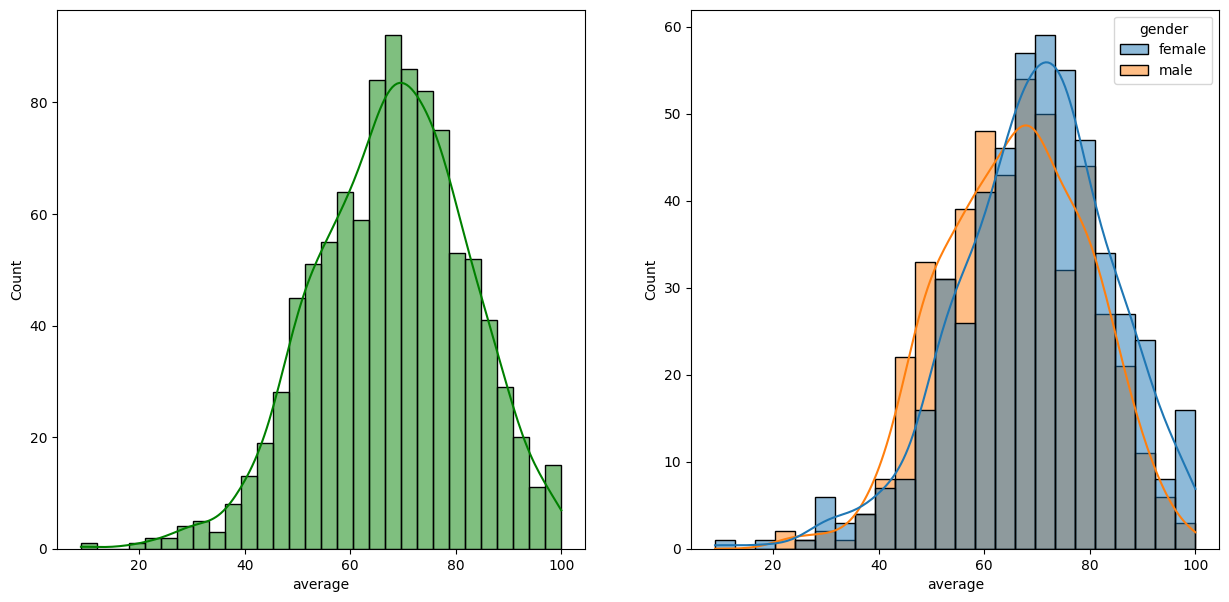

In [26]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

TOTAL PLOT

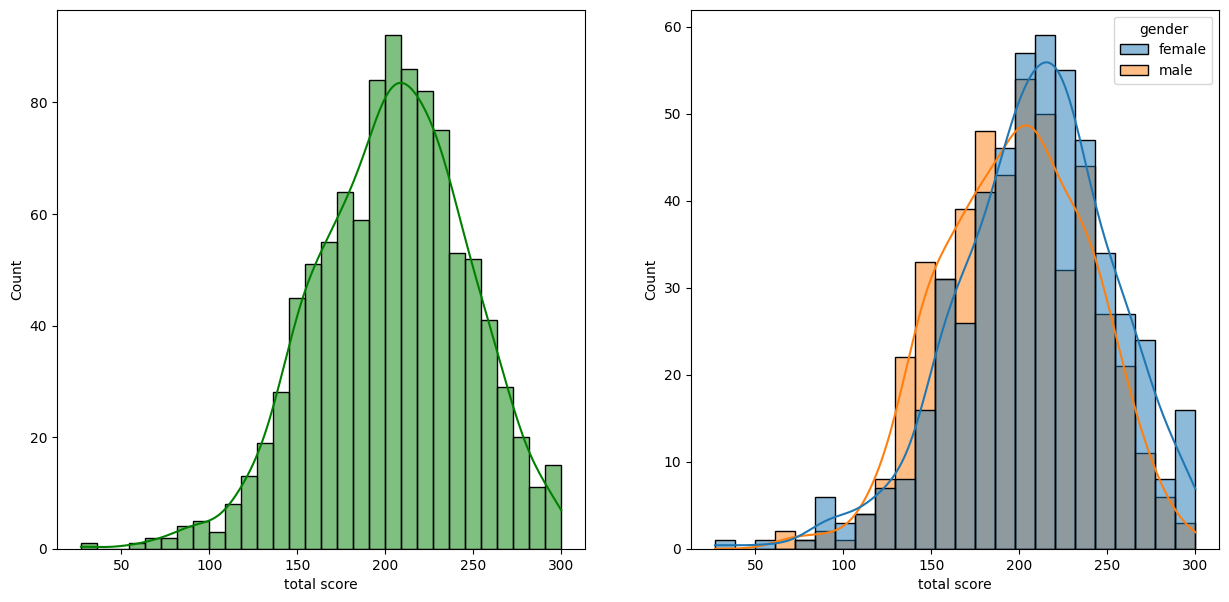

In [27]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

* **Female students perform better than male students**

------

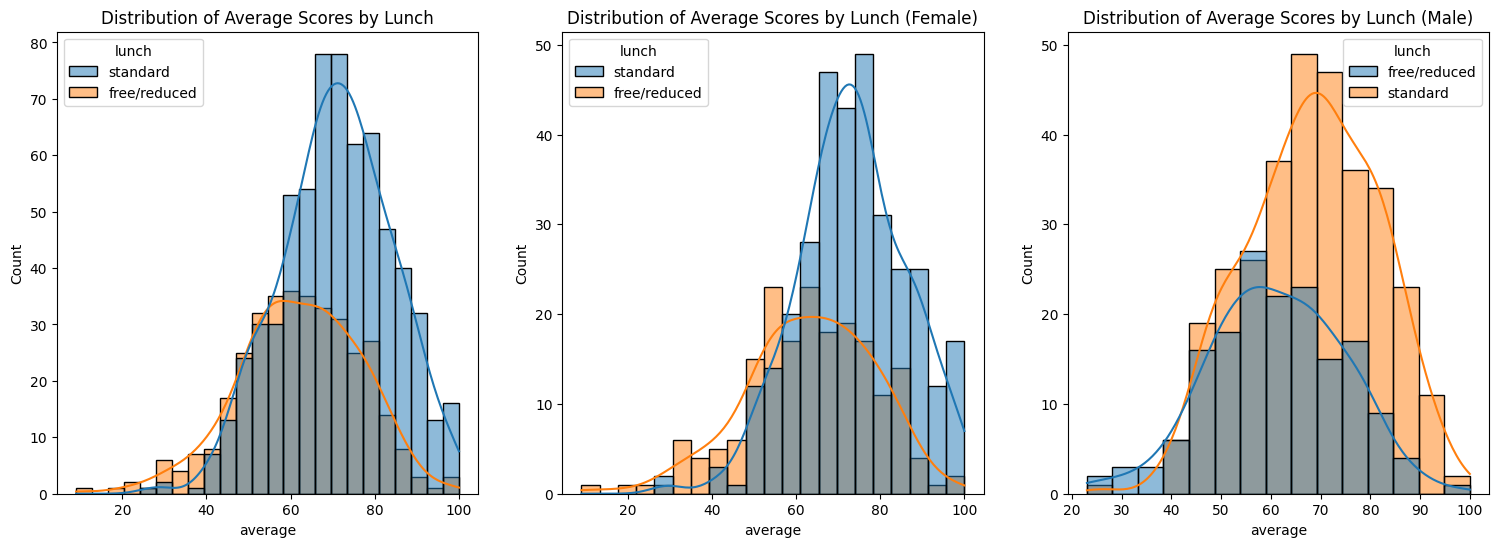

In [28]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.title('Distribution of Average Scores by Lunch')

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.title('Distribution of Average Scores by Lunch (Female)')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.title('Distribution of Average Scores by Lunch (Male)')

plt.show()


* most of males have the Standard Lunch
* most of females have the free/reduced
* Standard is the overall type of Lunch
* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams be it a male or a female.

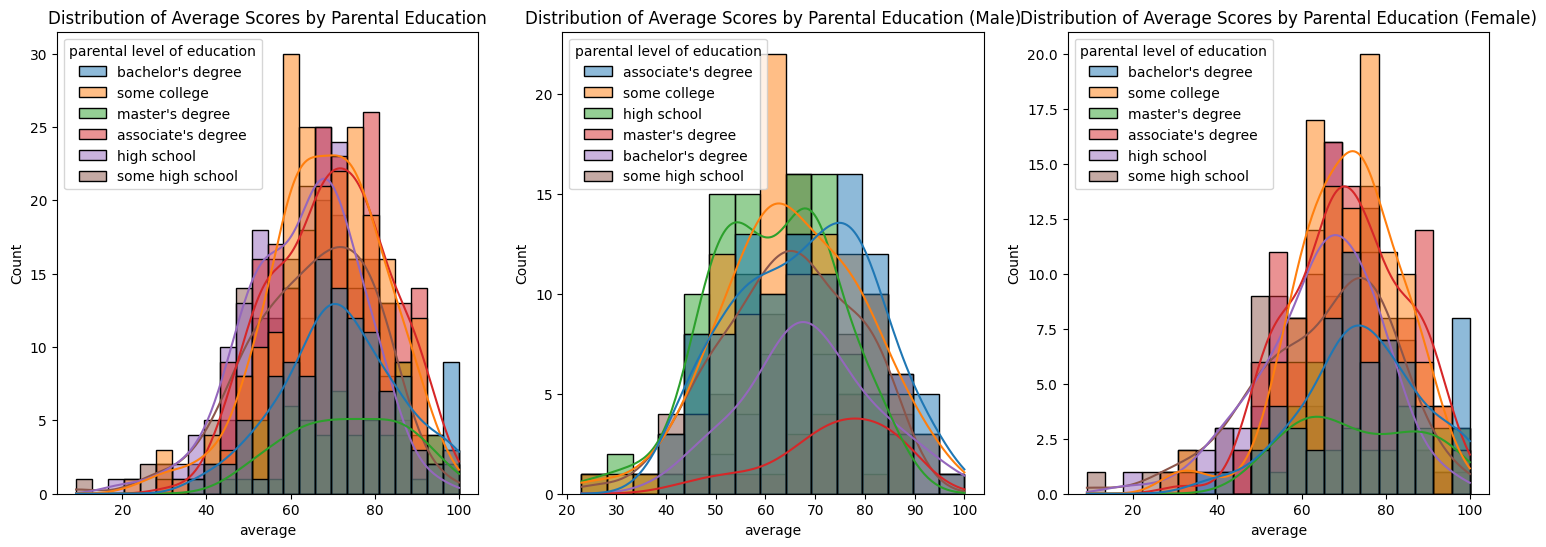

In [29]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.title('Distribution of Average Scores by Parental Education',fontsize=12)

plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental level of education')
plt.title('Distribution of Average Scores by Parental Education (Male)',fontsize=12)

plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental level of education')
plt.title('Distribution of Average Scores by Parental Education (Female)',fontsize=12)

plt.show()


* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.

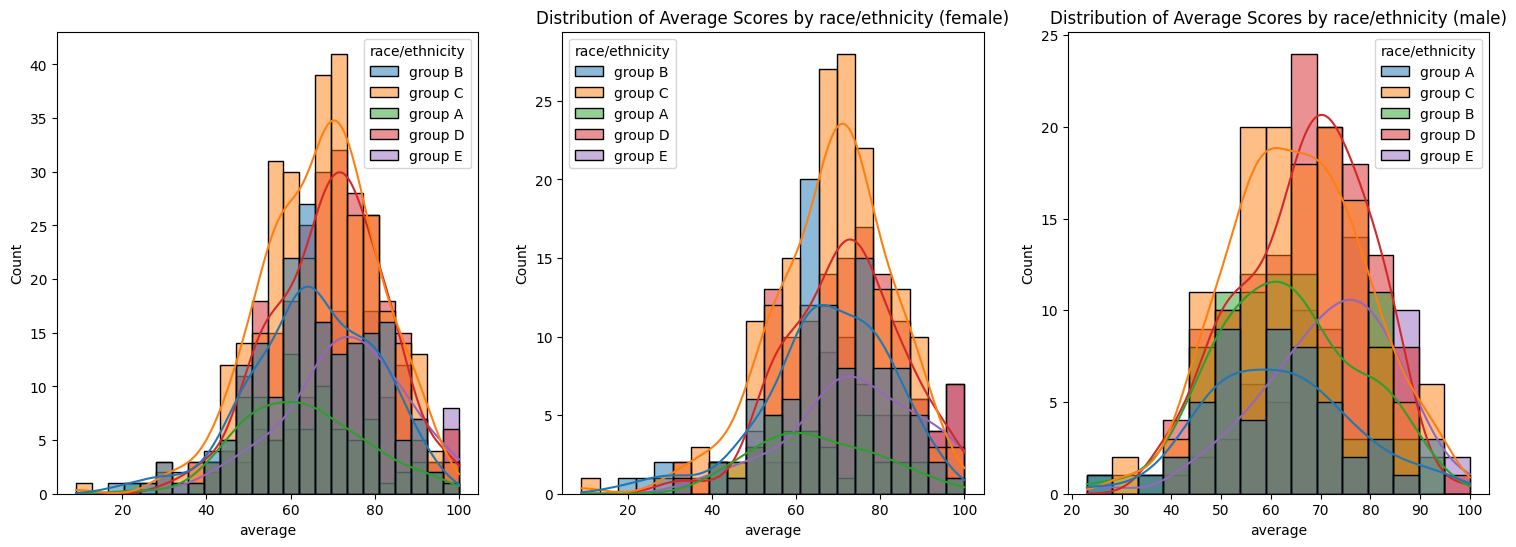

In [30]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.title('Distribution of Average Scores by race/ethnicity (female)',fontsize=12)
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.title('Distribution of Average Scores by race/ethnicity (male)',fontsize=12)

plt.show()

* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

**Maximumum score of students in all three subjects**

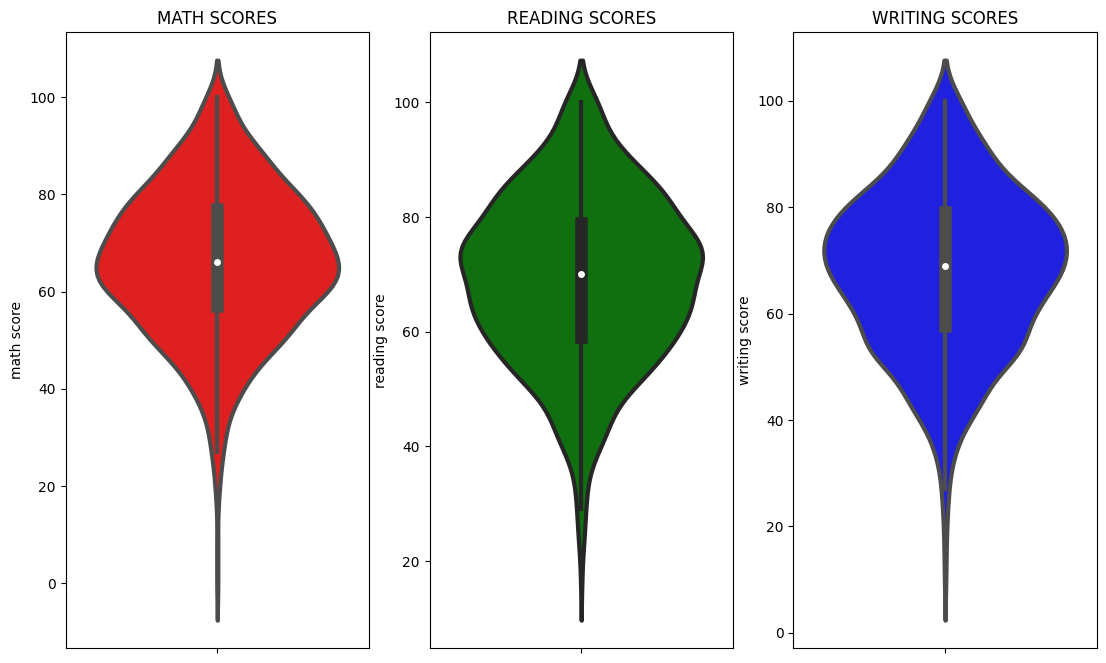

In [31]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

* that most of the students score in between 60-80 in Maths 
* reading and writing most of them score from 50-80

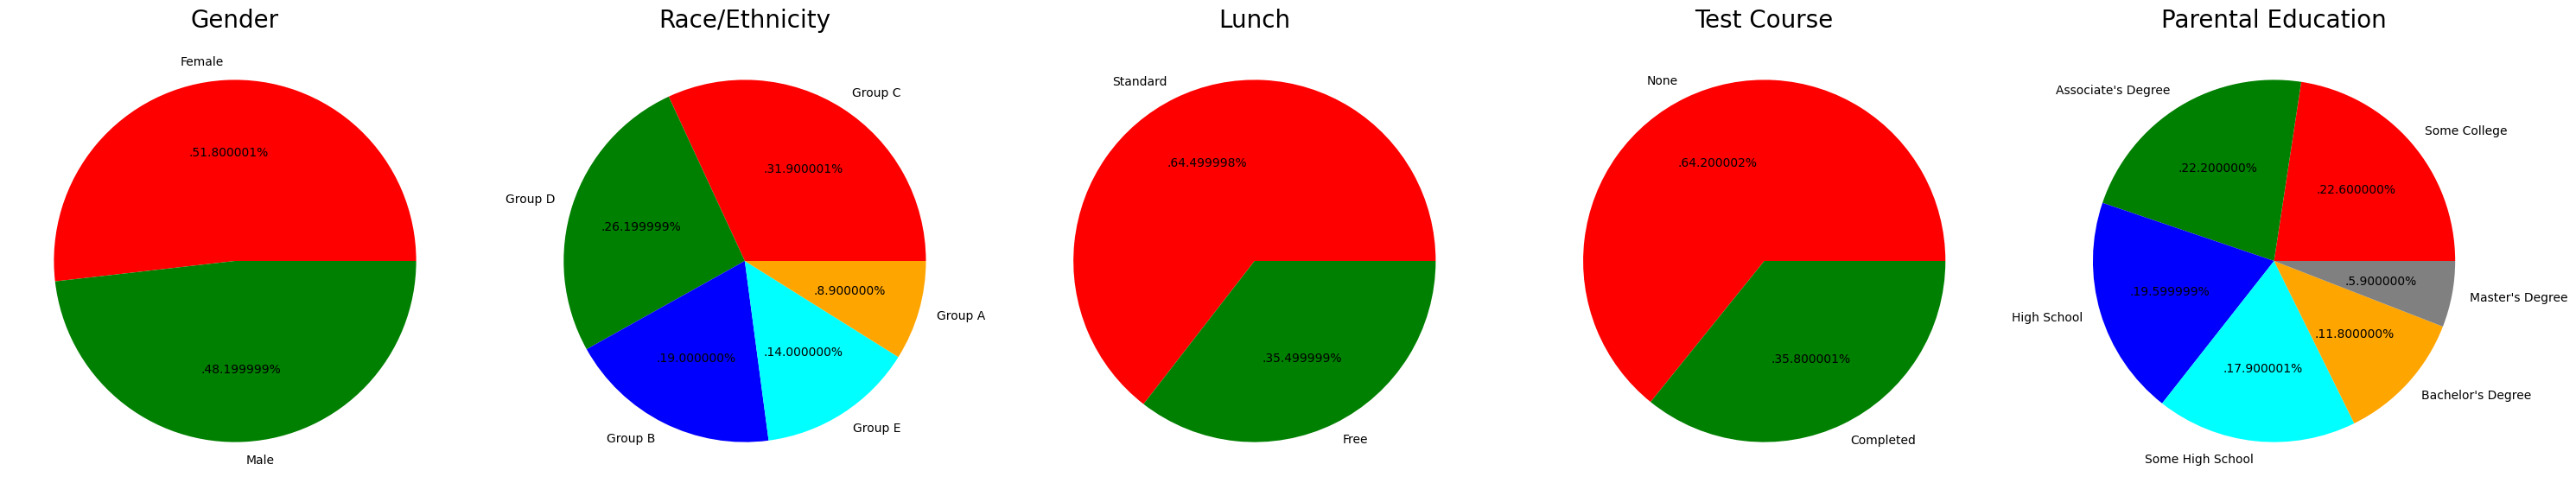

In [32]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size1 = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size1, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('on')



plt.subplot(1, 5, 2)
size2 = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size2, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size3 = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size3, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size4 = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size4, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size5 = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size5, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

In [33]:
print(size1, size2, size3, size4, size5)

gender
female    518
male      482
Name: count, dtype: int64 race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64 lunch
standard        645
free/reduced    355
Name: count, dtype: int64 test preparation course
none         642
completed    358
Name: count, dtype: int64 parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


# * Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

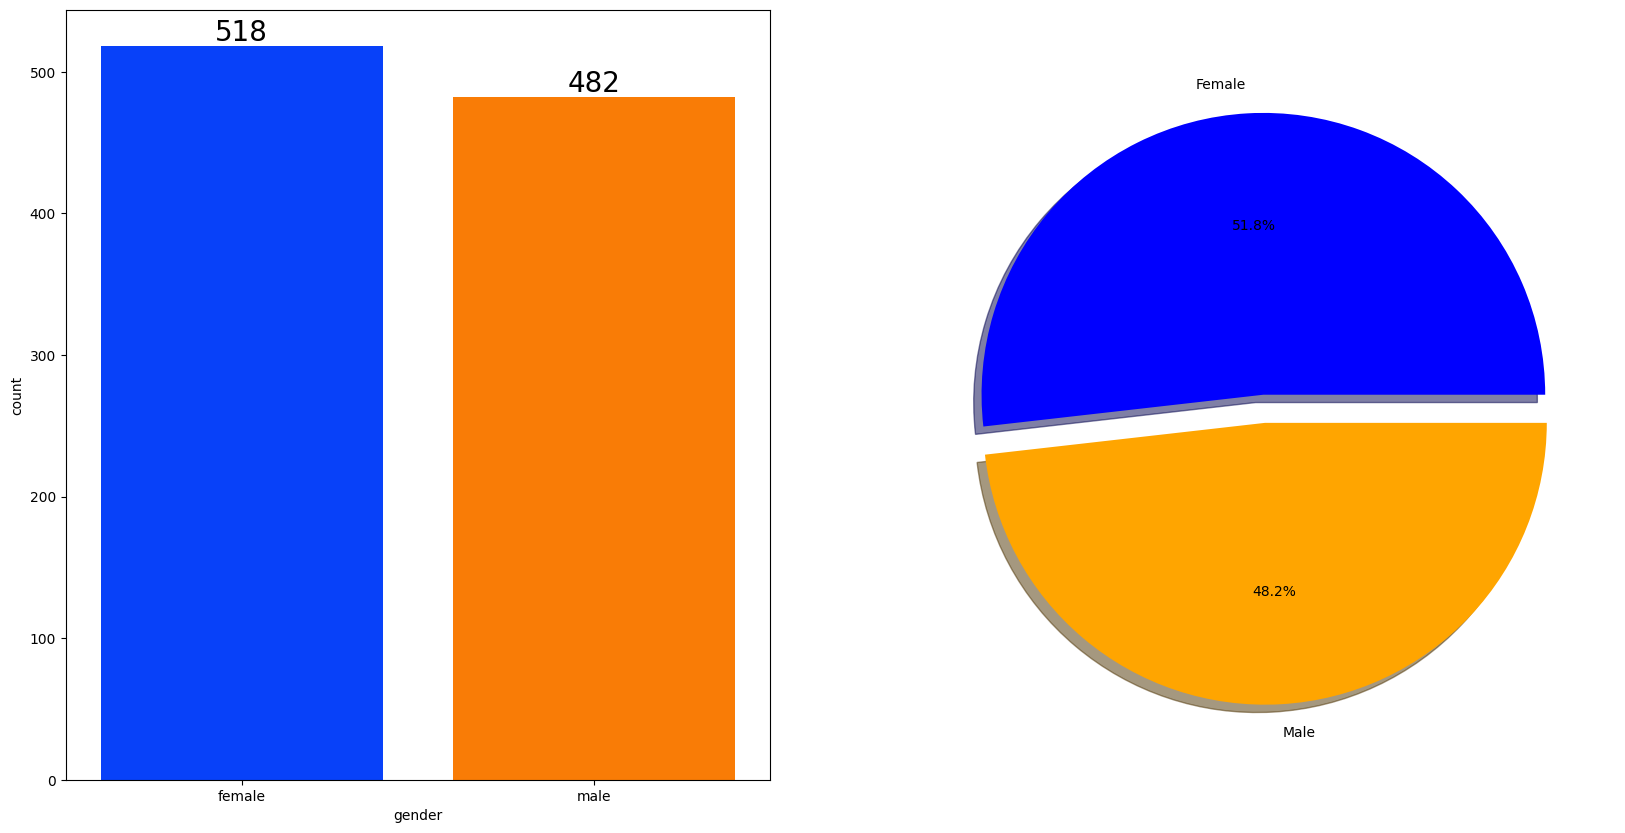

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Count plot on the first subplot
sns.countplot(x='gender', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart on the second subplot
ax[1].pie(x=df['gender'].value_counts(), labels=['Female', 'Male'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['blue', 'orange'])

# Display the plot
plt.show()

In [35]:
# Example assuming 'math score', 'reading score', 'writing score' are numeric columns
numeric_cols = ['math score', 'reading score', 'writing score']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Now group by 'gender' and compute mean
gender_group = df.groupby('gender')[numeric_cols].mean()
gender_group


,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


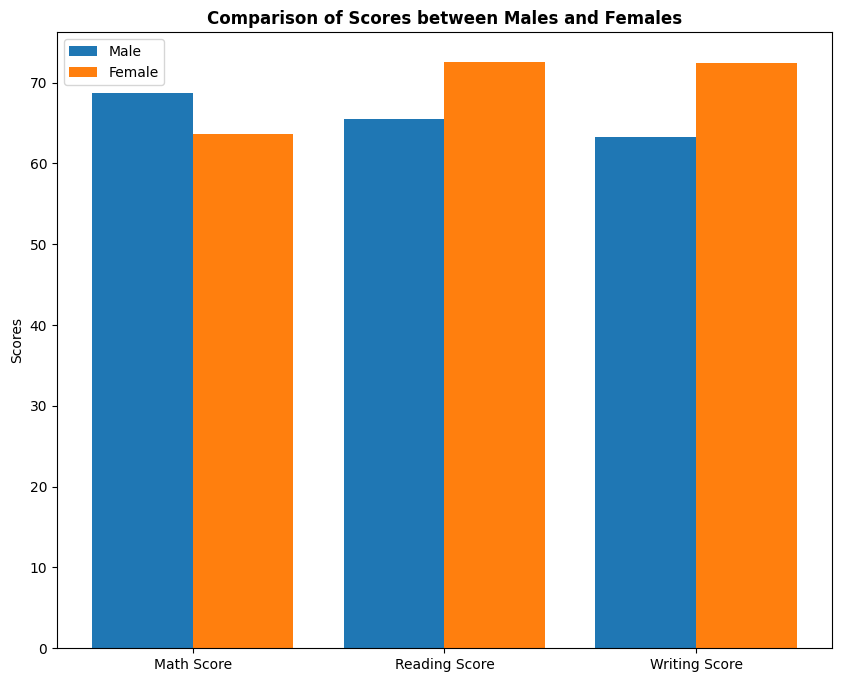

In [36]:
plt.figure(figsize=(10, 8))
columns_to_plot = ['math score', 'reading score', 'writing score']

X = ['Math Score', 'Reading Score', 'Writing Score']

female_scores = [gender_group.loc['female', col] for col in columns_to_plot]
male_scores = [gender_group.loc['male', col] for col in columns_to_plot]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Scores")
plt.title("Comparison of Scores between Males and Females", fontweight='bold')
plt.legend()
plt.show()

* On an average females have a better overall score than men.
* whereas males have scored higher in Maths.

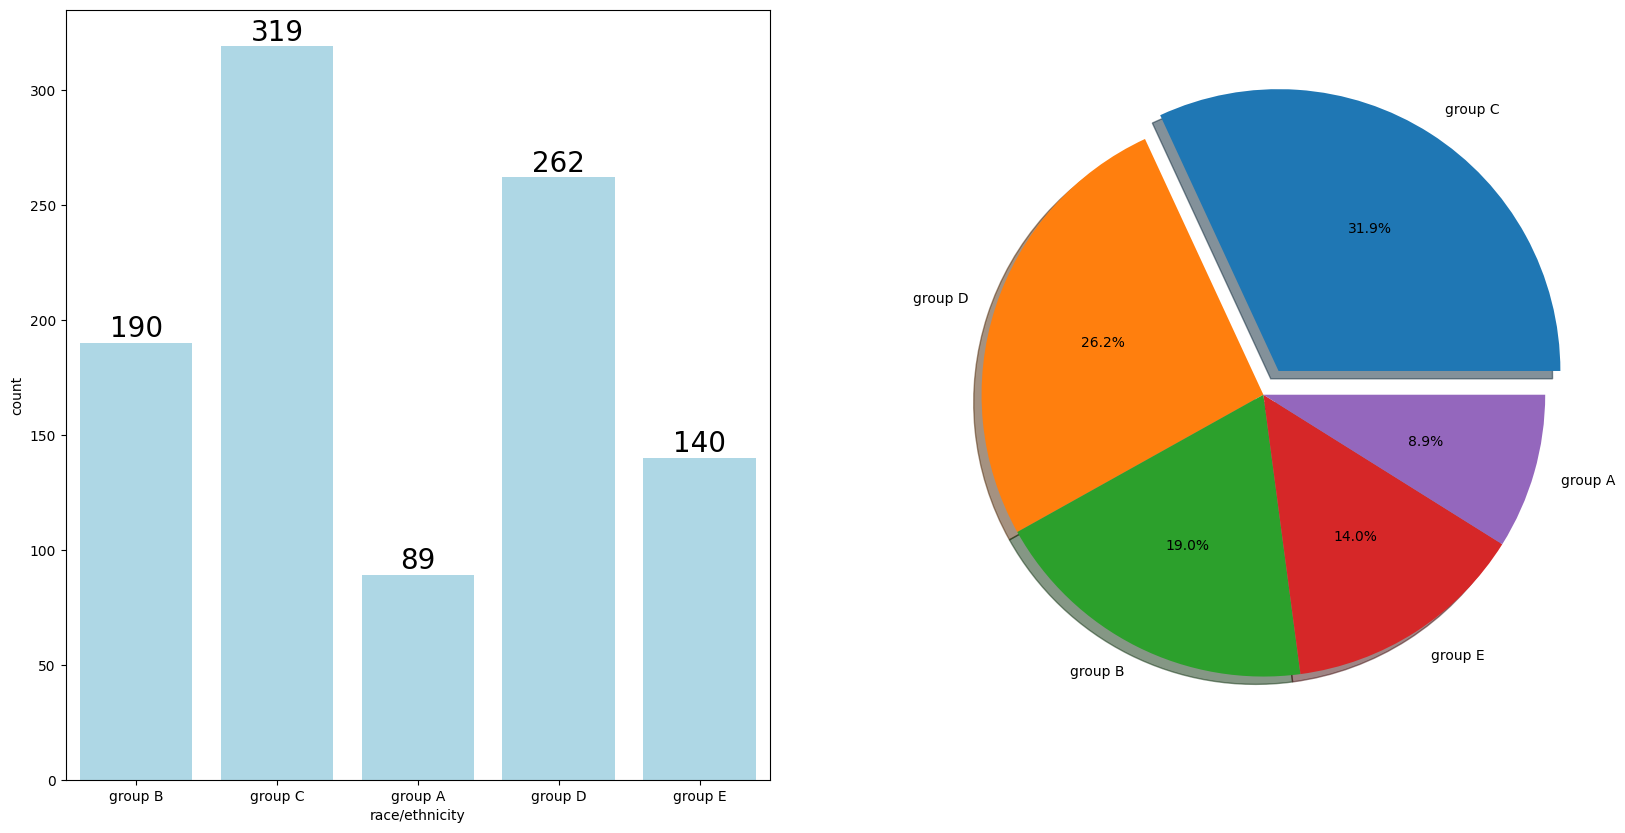

In [37]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,color='lightblue', ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.

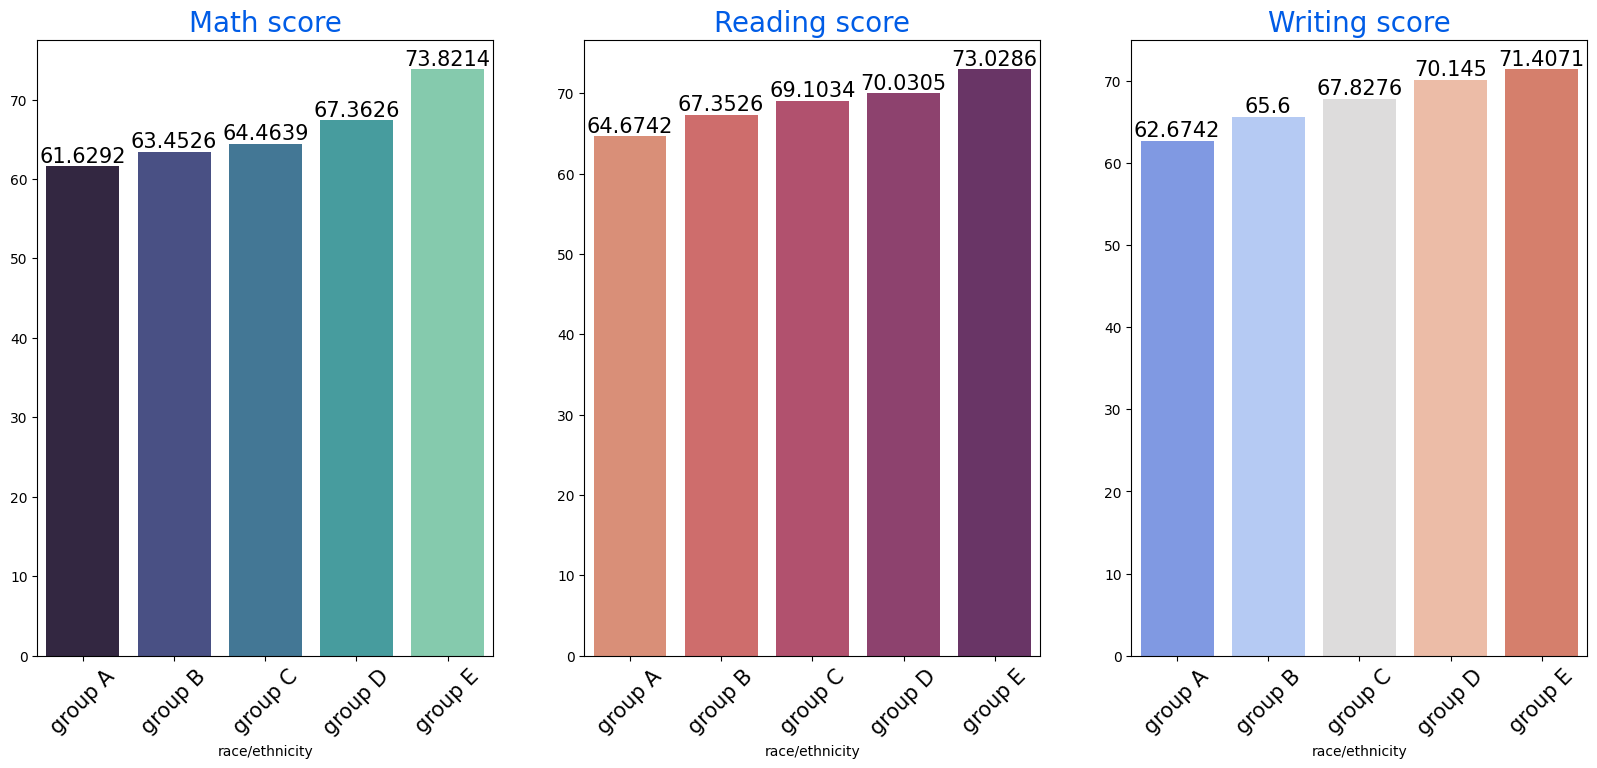

In [38]:
Group_data2=df.groupby('race/ethnicity')
Group_data2

f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45 , fontsize=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)
 

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45 , fontsize=15)


sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)
    ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45 , fontsize=15)


* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects

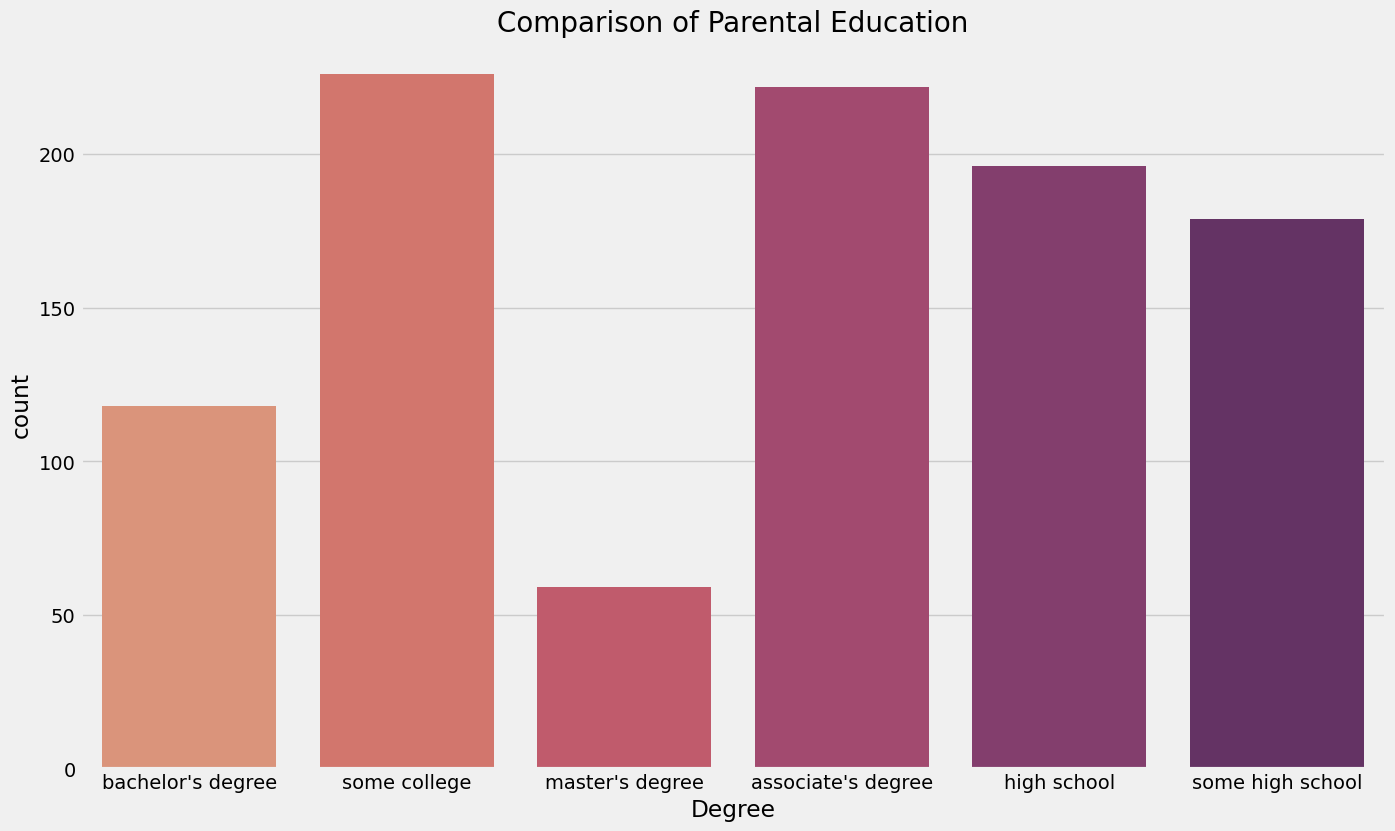

In [39]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental level of education'], palette = 'flare')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

* Largest number of parents are from some college.
* smallest number of parents are from Master's degree.

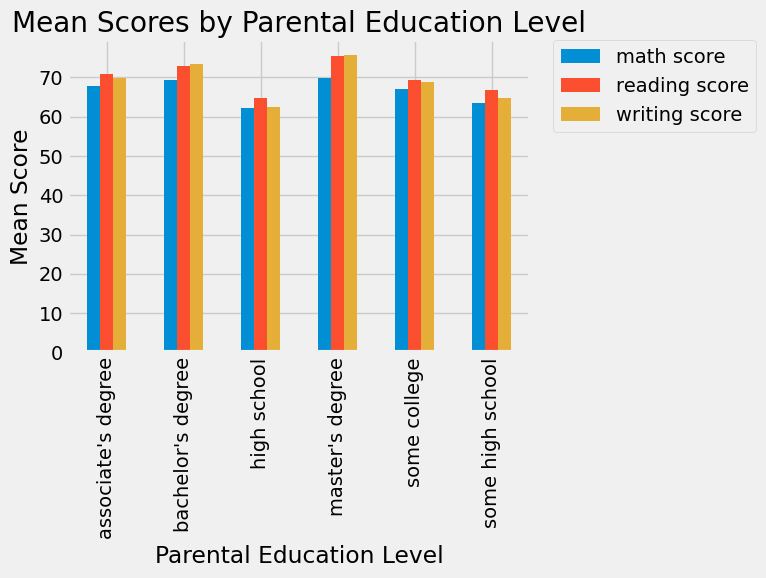

In [40]:
grouped_df3 = df.groupby('parental level of education')[numeric_cols].mean()

# Plotting
grouped_df3.plot(kind='bar', figsize=(8, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Mean Scores by Parental Education Level')
plt.ylabel('Mean Score')
plt.xlabel('Parental Education Level')

plt.tight_layout()
plt.show()

* The score of student whose parents possess master and bachelor level education are higher than others.


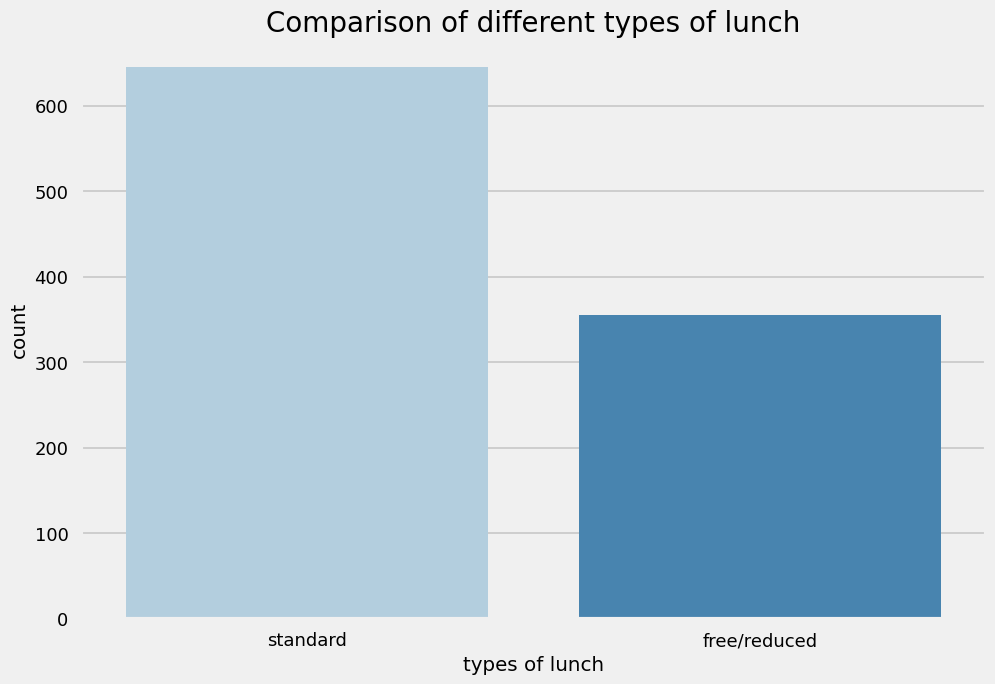

In [41]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(x=df['lunch'], palette = 'Blues')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

* Students being served Standard lunch was more than free lunch

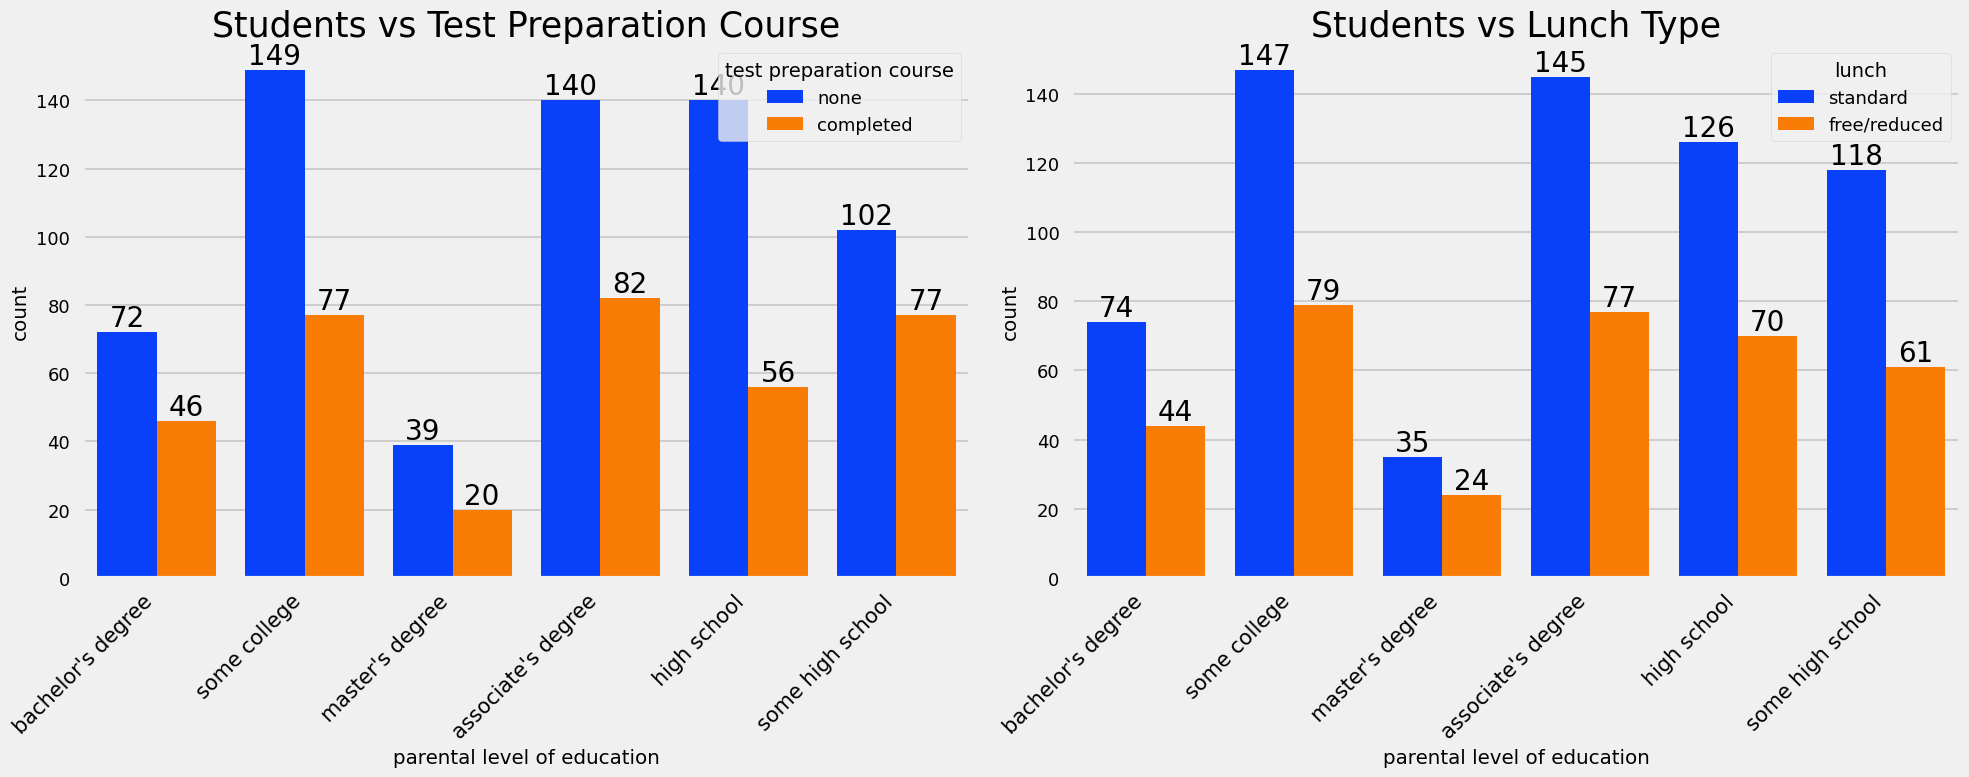

In [42]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# First subplot
sns.countplot(x='parental level of education', data=df, palette='bright', hue='test preparation course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right',fontsize=15)  # Rotate x-axis labels

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Second subplot
sns.countplot(x='parental level of education', data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])
ax[1].set_title('Students vs Lunch Type', color='black', size=25)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right',fontsize=15)  # Rotate x-axis labels

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.tight_layout()
plt.show()

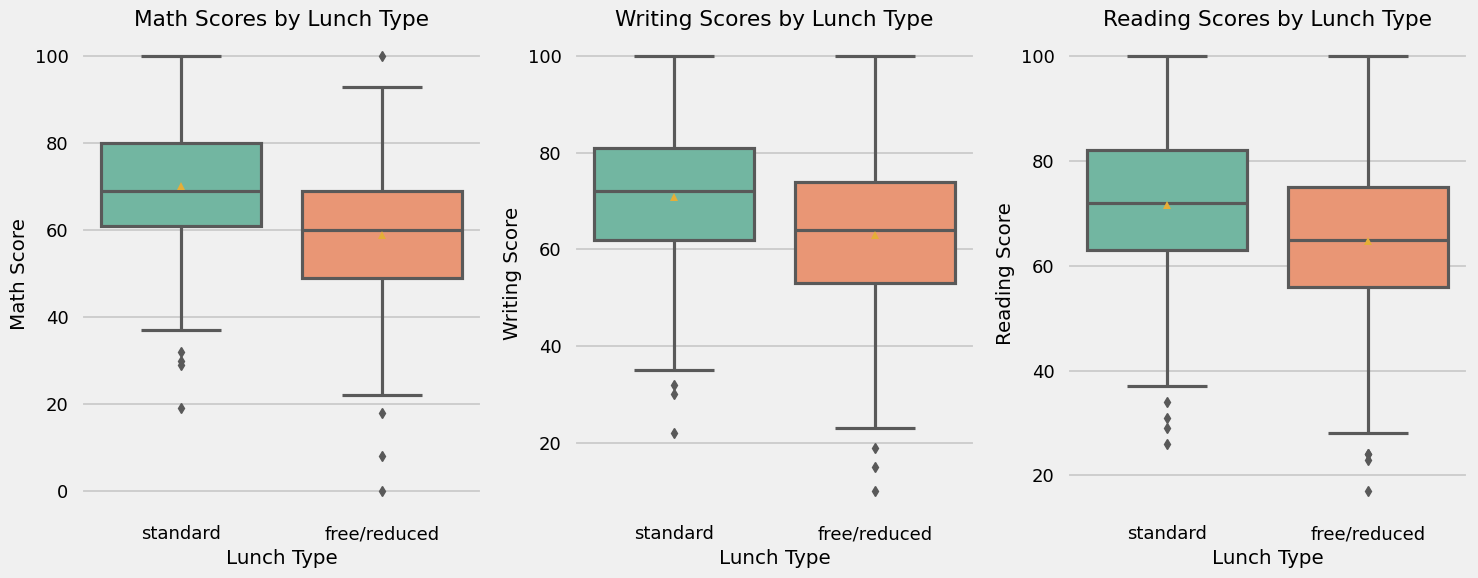

In [43]:
plt.figure(figsize=(15, 6))

# Math score
plt.subplot(1, 3, 1)
sns.boxplot(x='lunch', y='math score', data=df, palette='Set2', showmeans=True)
plt.title('Math Scores by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Math Score')

# Writing score
plt.subplot(1, 3, 2)
sns.boxplot(x='lunch', y='writing score', data=df, palette='Set2', showmeans=True)
plt.title('Writing Scores by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Writing Score')

# Reading score
plt.subplot(1, 3, 3)
sns.boxplot(x='lunch', y='reading score', data=df, palette='Set2', showmeans=True)
plt.title('Reading Scores by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Reading Score')

plt.tight_layout()
plt.show()

**Students who get Standard Lunch tend to perform better than students who got free/reduced lunch**

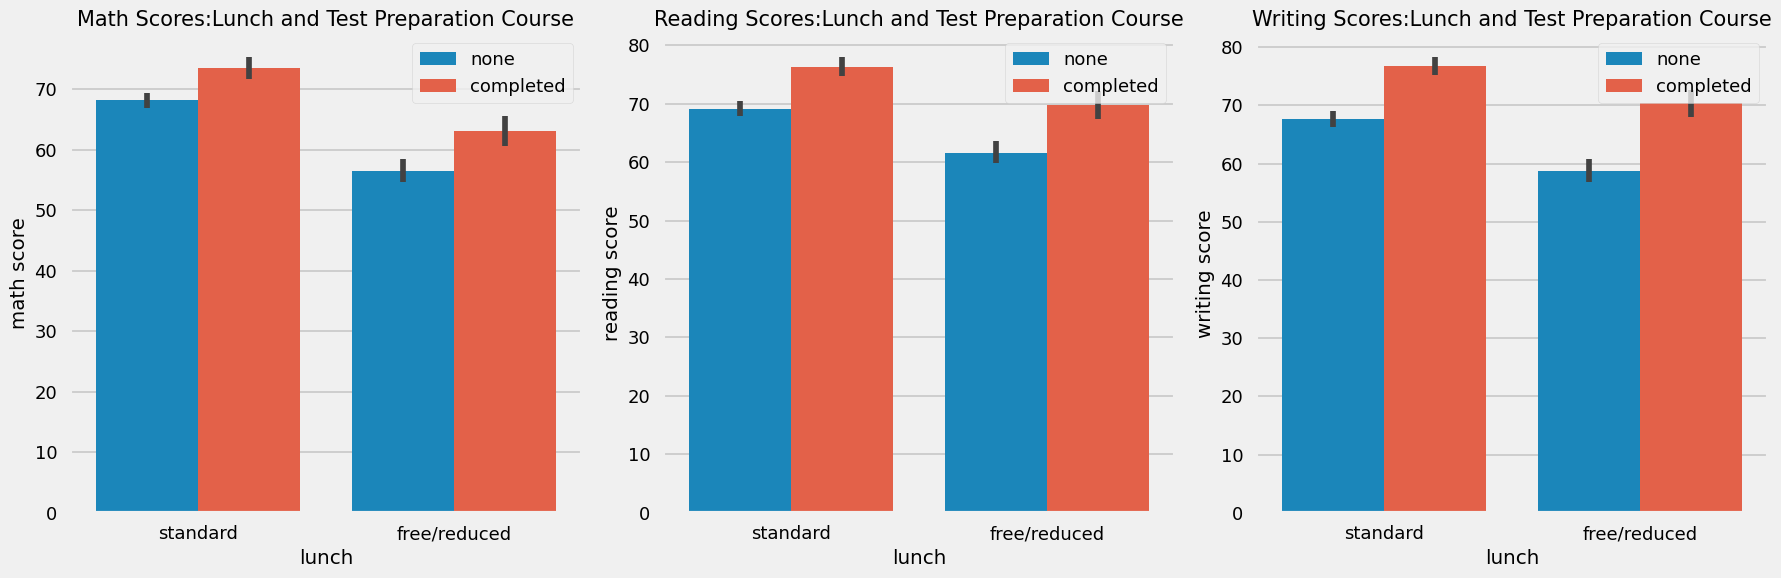

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Math score by lunch and test preparation course
sns.barplot(x='lunch', y='math score', hue='test preparation course', data=df, ax=axes[0])
axes[0].set_title('Math Scores:Lunch and Test Preparation Course',fontsize=15)

# Plot 2: Reading score by lunch and test preparation course
sns.barplot(x='lunch', y='reading score', hue='test preparation course', data=df, ax=axes[1])
axes[1].set_title('Reading Scores:Lunch and Test Preparation Course',fontsize=15)

# Plot 3: Writing score by lunch and test preparation course
sns.barplot(x='lunch', y='writing score', hue='test preparation course', data=df, ax=axes[2])
axes[2].set_title('Writing Scores:Lunch and Test Preparation Course',fontsize=15)

# Adjust legend position
for ax in axes:
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

* **Students who have completed the Test Prepration Course have higher scores in all three categories than those who haven't taken the course**
* **Students have Standard lunch have higher scores**

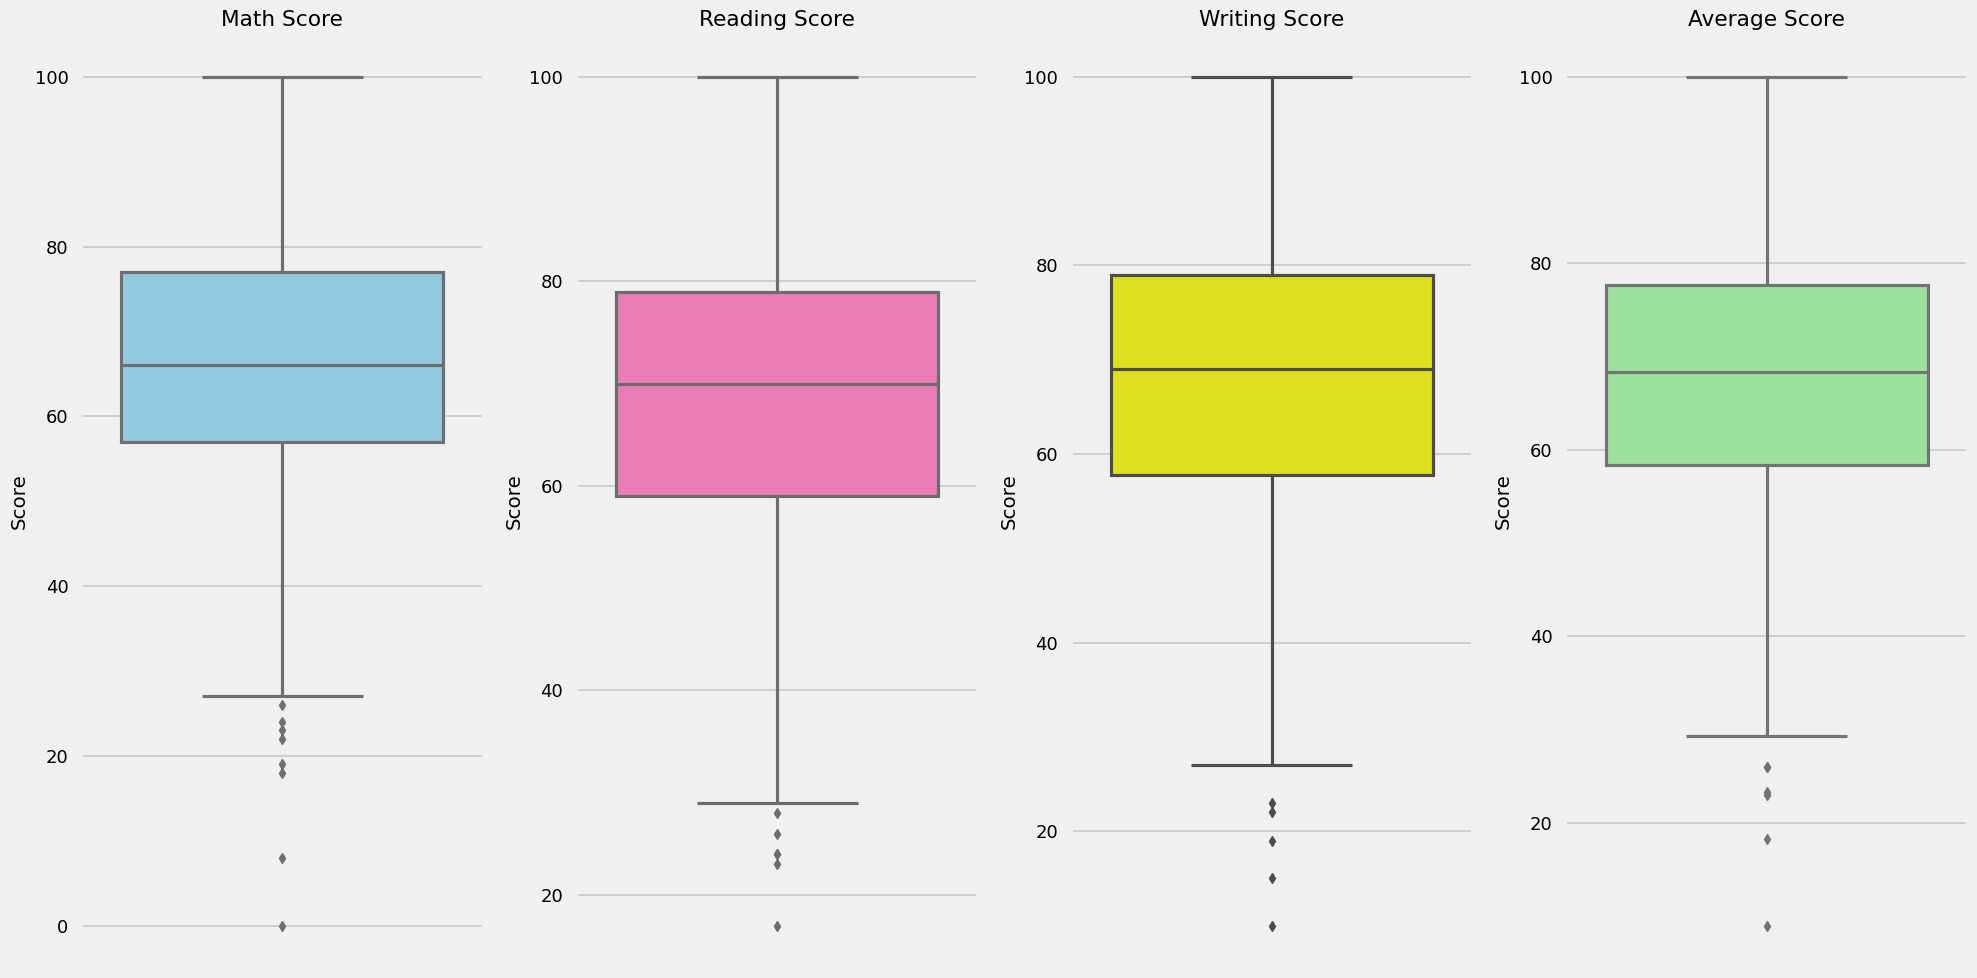

In [45]:
fig, axes = plt.subplots(1, 4, figsize=(20, 10))  # Adjust figsize as needed

# Plot 1: Math score
sns.boxplot(y=df['math score'], ax=axes[0], color='skyblue')
axes[0].set_title('Math Score')
axes[0].set_ylabel('Score')

# Plot 2: Reading score
sns.boxplot(y=df['reading score'], ax=axes[1], color='hotpink')
axes[1].set_title('Reading Score')
axes[1].set_ylabel('Score')

# Plot 3: Writing score
sns.boxplot(y=df['writing score'], ax=axes[2], color='yellow')
axes[2].set_title('Writing Score')
axes[2].set_ylabel('Score')

# Plot 4: Average score
sns.boxplot(y=df['average'], ax=axes[3], color='lightgreen')
axes[3].set_title('Average Score')
axes[3].set_ylabel('Score')

plt.tight_layout()
plt.show()

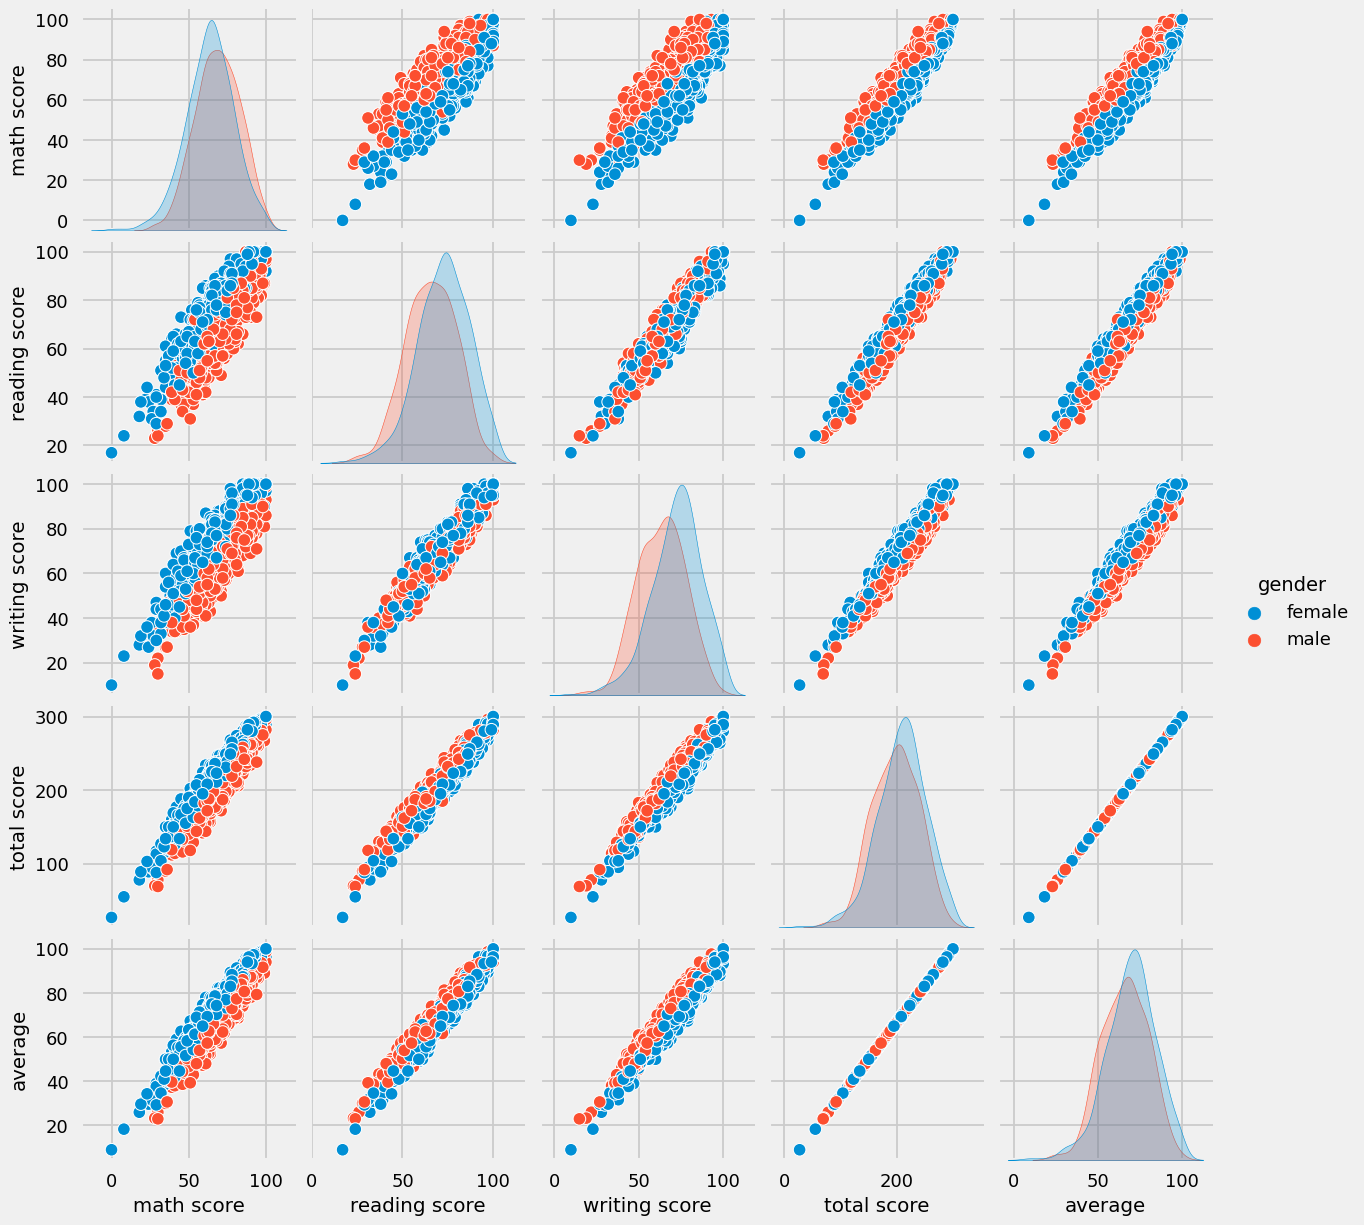

In [46]:
sns.pairplot(df,hue = 'gender')
plt.show()

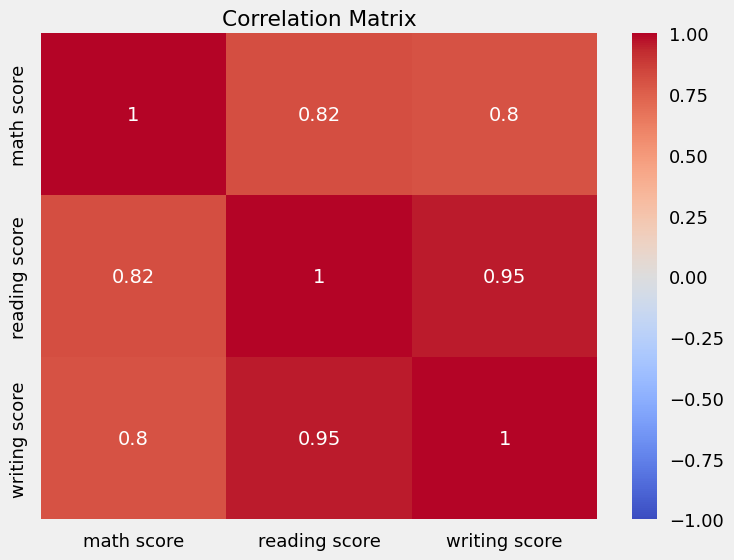

In [47]:
corr_matrix = df[numeric_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

* **all the scores increase "linearly" with each other.**

In [48]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score', 'average'],
      dtype='object')

* **Student's Performance is related with lunch, race, parental level education**
* **Females lead in pass percentage and also are top-scorers**
* **Student's Performance is not much related with test preparation course**
* **Finishing preparation course is benefitial.**

In [49]:
from sklearn.preprocessing import LabelEncoder

# Example DataFrame (replace with your actual data)

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode categorical columns
df_encoded = df.copy()
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in cat_cols:
    df_encoded[col] = encoder.fit_transform(df[col])

# Display encoded DataFrame
print("Encoded DataFrame:")
print(df_encoded)


Encoded DataFrame:
     gender  race/ethnicity  parental level of education  lunch  \
0         0               1                            1      1   
1         0               2                            4      1   
2         0               1                            3      1   
3         1               0                            0      0   
4         1               2                            4      1   
..      ...             ...                          ...    ...   
995       0               4                            3      1   
996       1               2                            2      0   
997       0               2                            2      0   
998       0               3                            4      1   
999       0               3                            4      0   

     test preparation course  math score  reading score  writing score  \
0                          1          72             72             74   
1                          0

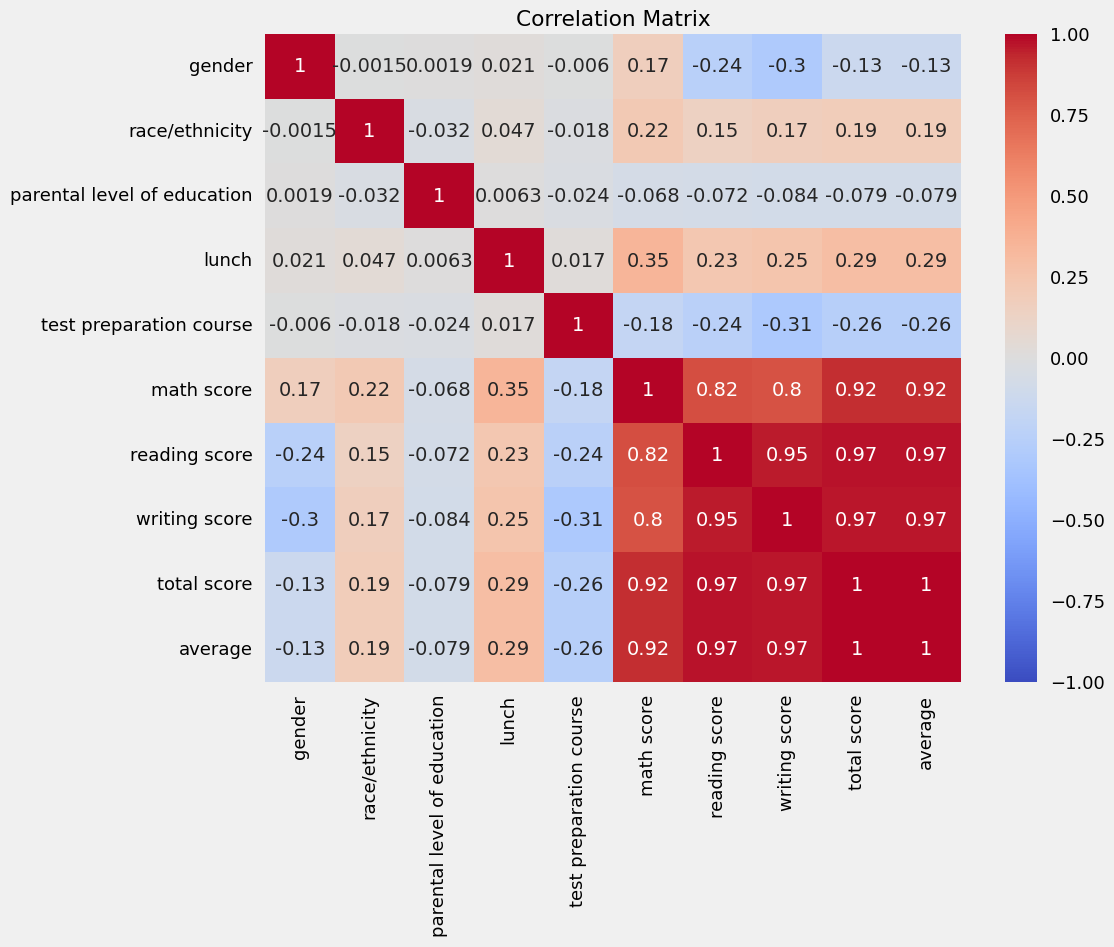

In [50]:
# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


# **MODELS**

In [1]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [17]:
X = df.drop(columns=['math score'],axis=1)
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [18]:
y = df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [19]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [20]:
X = preprocessor.fit_transform(X)
X.shape


(1000, 19)

In [22]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

**Models Evaluation**

In [23]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

# **Models**

In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}


In [28]:
model_list = []
r2_list =[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i],"\n")
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression 

Model performance for Training set
- Root Mean Squared Error: 5.3276
- Mean Absolute Error: 4.2691
- R2 Score: 0.8741
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4185
- Mean Absolute Error: 4.2234
- R2 Score: 0.8793


Lasso 

Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge 

Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor 

Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
---------------

In [30]:
model_df=pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

In [31]:
model_df

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879345
5,Random Forest Regressor,0.854367
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.843824
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.750142


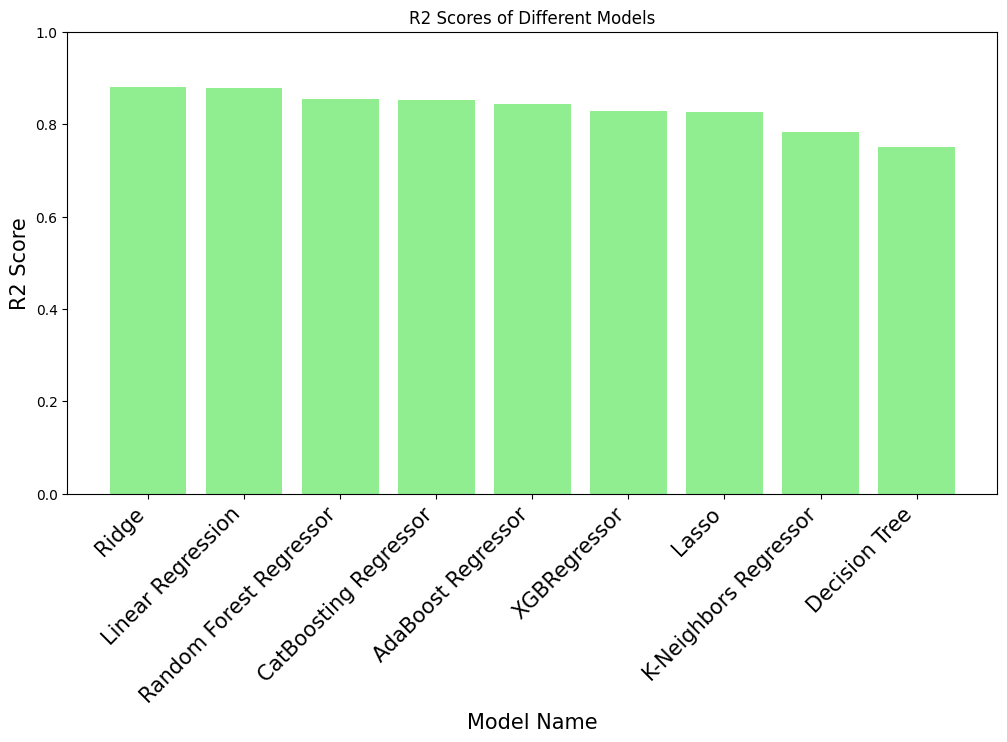

                Model Name  R2_Score
2                    Ridge  0.880593
0        Linear Regression  0.879345
5  Random Forest Regressor  0.854367
7    CatBoosting Regressor  0.851632
8       AdaBoost Regressor  0.843824
6             XGBRegressor  0.827797
1                    Lasso  0.825320
3    K-Neighbors Regressor  0.783813
4            Decision Tree  0.750142


In [35]:
plt.figure(figsize=(12, 6))
plt.bar(model_df['Model Name'], model_df['R2_Score'], color='lightgreen')
plt.xlabel('Model Name',fontsize=15)
plt.ylabel('R2 Score',fontsize=15)
plt.title('R2 Scores of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45,fontsize=15,ha='right')
plt.show()

# Display the DataFrame
print(model_df)

# LinearRegression

In [43]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.93


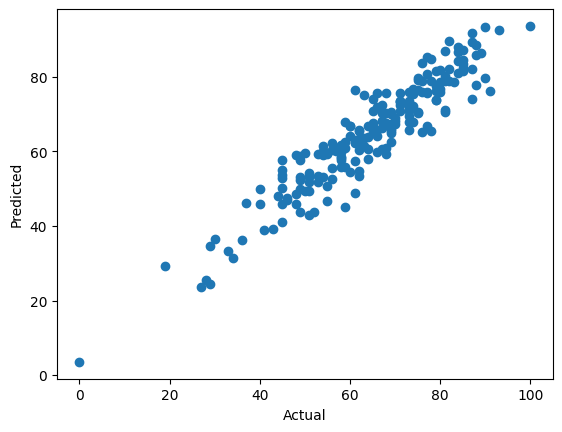

In [44]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

*******

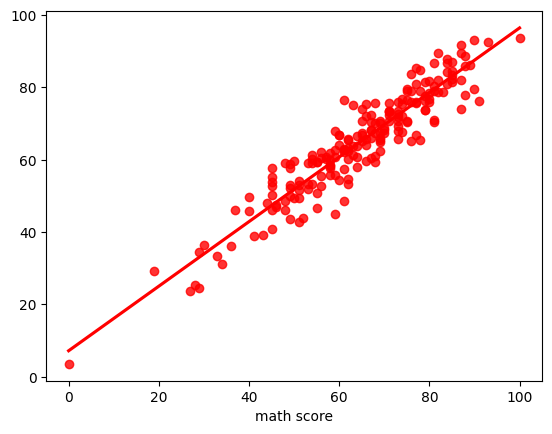

In [45]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

* **Difference between Actual and Predicted Values**

In [46]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.18750,14.81250
737,53,59.21875,-6.21875
740,80,76.81250,3.18750
660,74,76.81250,-2.81250
411,84,87.96875,-3.96875
...,...,...,...
408,52,43.78125,8.21875
332,62,62.40625,-0.40625
208,74,67.81250,6.18750
613,65,66.84375,-1.84375


In [47]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.18750,14.81250
737,53,59.21875,-6.21875
740,80,76.81250,3.18750
660,74,76.81250,-2.81250
411,84,87.96875,-3.96875
...,...,...,...
408,52,43.78125,8.21875
332,62,62.40625,-0.40625
208,74,67.81250,6.18750
613,65,66.84375,-1.84375
